In [17]:
import numpy as np  # numerical library
import xarray as xr  # netCDF library

import matplotlib.pyplot as plt  # plotting library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list

import cftime

import dask
import dask.array as da

In [48]:
from dask.distributed import Client

# Setup a local cluster.
# By default this sets up 1 worker per core
client = Client(memory_limit="2 GiB")
client.cluster

/opt/conda/envs/ocean/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42061 instead
  warnings.warn(


LocalCluster(53e4e59a, 'tcp://127.0.0.1:37479', workers=14, threads=112, memory=28.00 GiB)

2024-05-22 16:25:34,103 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:37977 (pid=47177) exceeded 95% memory budget. Restarting...
2024-05-22 16:25:34,180 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:37977' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {'original-open_dataset-thetao-57b54290831e294e385c642e4de78ec0', ('mean_chunk-d151c5b2c78da836ff31e62adb5e7057', 249, 7), ('open_dataset-thetao-cbc4116b19f120fefdbad0515b39fed0', 0, 1, 1, 0), ('open_dataset-thetao-cbc4116b19f120fefdbad0515b39fed0', 0, 1, 0, 1), ('mean_chunk-e685339d3701554a09a7509c7f472588', 249, 4, 2), 'original-open_dataset-thetao-6538973c236ad73450d78a9e92f744ed', ('open_dataset-thetao-cbc4116b19f120fefdbad0515b39fed0', 0, 1, 2, 1), 'original-open_dataset-thetao-255b70d118e9c4de8d2b029d629fe997', 'original-open_dataset-thetao-3d228aef7c275efd383ce0616d89649e', ('open_dataset-thetao-cbc4116b19f120fefdbad0515b39fed0', 0, 1, 0, 0), ('mean_

2024-05-22 16:25:42,328 - distributed.nanny - WARNING - Restarting worker
2024-05-22 16:25:42,846 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:43163 (pid=47153) exceeded 95% memory budget. Restarting...
2024-05-22 16:25:43,031 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:43163' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('mean_combine-partial-0df9f2f99890de9d66cd1e46fc9b496e', 251, 6, 1), ('open_dataset-thetao-e74c739671758165eaddfed29d2f33e3', 0, 1, 0, 1), ('mean_chunk-d151c5b2c78da836ff31e62adb5e7057', 251, 4), 'original-open_dataset-thetao-e74c739671758165eaddfed29d2f33e3', ('mean_chunk-d151c5b2c78da836ff31e62adb5e7057', 251, 7), ('open_dataset-thetao-e74c739671758165eaddfed29d2f33e3', 0, 0, 1, 0), ('open_dataset-thetao-e74c739671758165eaddfed29d2f33e3', 0, 0, 0, 2), ('mean_combine-partial-766cab73f09b9a74964b9aef47e86c6d', 251, 6, 2, 0), 'original-open_dataset-thetao-b7a23595f19772611520eb963293

2024-05-22 16:26:52,282 - distributed.nanny - WARNING - Restarting worker
2024-05-22 16:27:05,898 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:43823 (pid=47504) exceeded 95% memory budget. Restarting...
2024-05-22 16:27:06,020 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-78eb6fd0b82378fb46aeae0a785e6004', 0, 3, 0, 1) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,022 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-7f121d4f2ce9bf86bace41d86620f43d', 0, 1, 1, 1) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,024 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-9af69639f841c51ba0ca1fc22801b2d0', 0, 3, 0, 2) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,025 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-511a8a409fe2cb68a6f916bdeb44b4cf', 0, 0, 1, 1) marked as failed because 4 workers died while trying to run it


2024-05-22 16:27:06,073 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-d7c70203e0b5cd03cbcba0571853aeb5', 0, 3, 1, 2) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,073 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-7f121d4f2ce9bf86bace41d86620f43d', 0, 1, 0, 2) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,074 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-1513e7447810c4ada5fb19395915b28f', 0, 2, 0, 3) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,077 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-9af69639f841c51ba0ca1fc22801b2d0', 0, 0, 0, 1) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,077 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-7f121d4f2ce9bf86bace41d86620f43d', 0, 0, 3, 1) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,078 -

2024-05-22 16:27:06,144 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-57b54290831e294e385c642e4de78ec0', 0, 2, 0, 1) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,145 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-7f121d4f2ce9bf86bace41d86620f43d', 0, 0, 3, 3) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,147 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-9af69639f841c51ba0ca1fc22801b2d0', 0, 3, 0, 1) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,149 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-b7a23595f19772611520eb96329369de', 0, 3, 1, 3) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,151 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-511a8a409fe2cb68a6f916bdeb44b4cf', 0, 0, 1, 0) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,153 -

2024-05-22 16:27:06,204 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-7f121d4f2ce9bf86bace41d86620f43d', 0, 2, 3, 3) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,205 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-78eb6fd0b82378fb46aeae0a785e6004', 0, 2, 2, 3) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,206 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-1513e7447810c4ada5fb19395915b28f', 0, 3, 3, 3) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,208 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-511a8a409fe2cb68a6f916bdeb44b4cf', 0, 2, 2, 0) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,209 - distributed.scheduler - ERROR - Task ('open_dataset-thetao-1513e7447810c4ada5fb19395915b28f', 0, 1, 0, 2) marked as failed because 4 workers died while trying to run it
2024-05-22 16:27:06,209 -

In [18]:
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [19]:
data_dir='/data/shareddata/Climatologias/Glorys/cmems_mod_glo_phy_my_0.083_P1M-m/NC/'

In [20]:
files = []
for iy in range(2000,2021):
    for im in range(1,13):
        files.append(data_dir+"mercatorglorys12v1_gl12_mean_%04d%02d.nc"%(iy,im))

https://docs.coiled.io/blog/xarray-at-scale.html

https://gist.github.com/fmaussion/48a33deae4fdee1f9433ec58c8956ac6

In [49]:
data = xr.open_mfdataset(files,chunks={'time': 100})

In [52]:
data

<xarray.Dataset> Size: 4TB
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 252)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2020-12-16T1...
Data variables:
    mlotst     (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    zos        (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    bottomT    (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    sithick    (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    siconc     (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    usi        (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    vsi        (time, latitude, longitude) float64 18GB dask.array<chunksize=(1, 681, 1440), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

TypeError: nanmean() got an unexpected keyword argument 'dims'

In [54]:
GL = data.drop_vars("mlotst").drop_vars("zos")
GL = GL.drop_vars("sithick").drop_vars("siconc")
GL = GL.drop_vars("usi").drop_vars("vsi").drop_vars("uo").drop_vars("vo").drop_vars("bottomT")

In [55]:
GL

<xarray.Dataset> Size: 2TB
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 252)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2020-12-16T1...
Data variables:
    thetao     (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

/opt/conda/envs/ocean/lib/python3.11/site-packages/distributed/client.py:3161: UserWarning: Sending large graph of size 49.59 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2024-05-22 16:25:33,833 - distributed.worker.memory - WARNING - Worker is at 84% memory usage. Pausing worker.  Process memory: 1.68 GiB -- Worker memory limit: 2.00 GiB
2024-05-22 16:25:34,731 - distributed.worker.memory - WARNING - Worker is at 82% memory usage. Pausing worker.  Process memory: 1.65 GiB -- Worker memory limit: 2.00 GiB
2024-05-22 16:25:39,848 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.60 GiB -- Worker memory limit: 2.00 GiB
2024-05-22 16:25:40,376 - distributed.worker.memory - WARNING - Worker is at 73% memory usage. Resuming worker. Process memory: 1.46 GiB -- Worker memory limit: 2.00 GiB
2024-05-22 16:25:40,870 - distributed.worker.memory - WARNING - Worker is at 85% mem

KilledWorker: Attempted to run task ('open_dataset-thetao-b0722a0b7ce0109a4806cc79457b3d2a', 0, 2, 1, 3) on 4 different workers, but all those workers died while running it. The last worker that attempt to run the task was tcp://127.0.0.1:43823. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

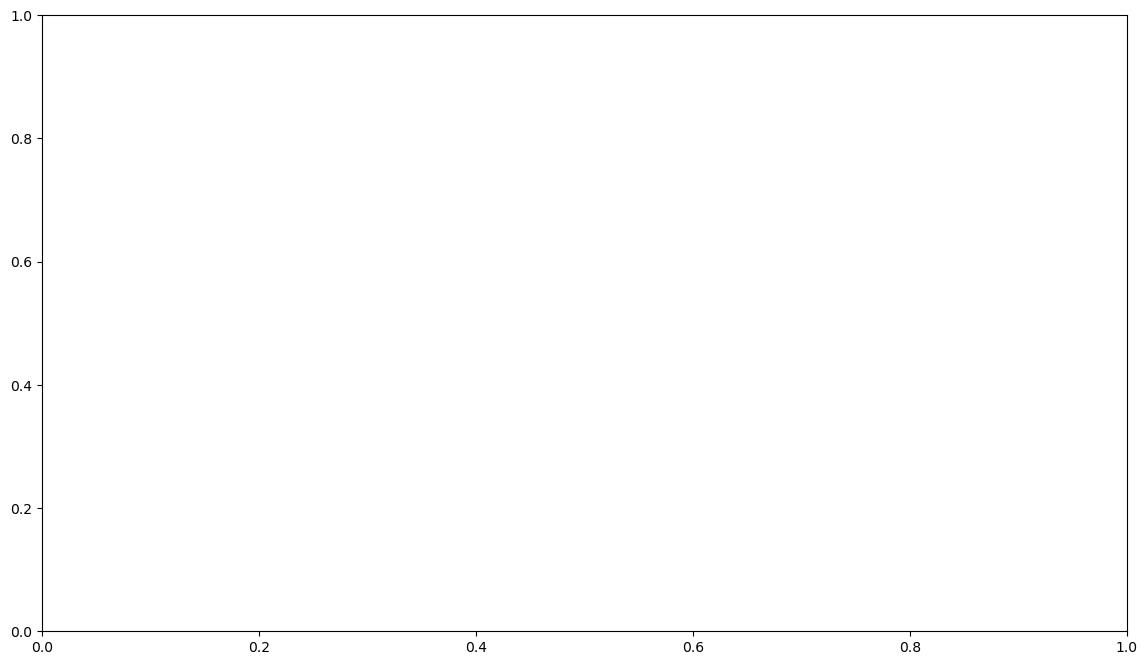

2024-05-22 16:27:09,712 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.61 GiB -- Worker memory limit: 2.00 GiB
2024-05-22 16:27:10,074 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 1.54 GiB -- Worker memory limit: 2.00 GiB
2024-05-22 16:27:10,498 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.62 GiB -- Worker memory limit: 2.00 GiB
2024-05-22 16:27:10,637 - distributed.worker.memory - WARNING - Worker is at 80% memory usage. Pausing worker.  Process memory: 1.61 GiB -- Worker memory limit: 2.00 GiB
2024-05-22 16:27:10,854 - distributed.worker.memory - WARNING - Worker is at 77% memory usage. Resuming worker. Process memory: 1.54 GiB -- Worker memory limit: 2.00 GiB
2024-05-22 16:27:10,940 - distributed.worker.memory - WARNING - Worker is at 76% memory usage. Resuming worker. Process memory: 1.52 GiB -- Worker mem

In [56]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(GL.time,
        GL.thetao.mean(dim='latitude').mean(dim='longitude').sel(depth=slice(0,2000)).mean('depth'))
ax.grid(linestyle='-', linewidth=.9);

In [17]:
GL.to_netcdf('./Data/GLORYS_Global_'+str(GL.time[0].dt.strftime('%Y-%m').values)+'_'+str(GL.time[-1].dt.strftime('%Y-%m').values)+'.nc')

KeyboardInterrupt: 